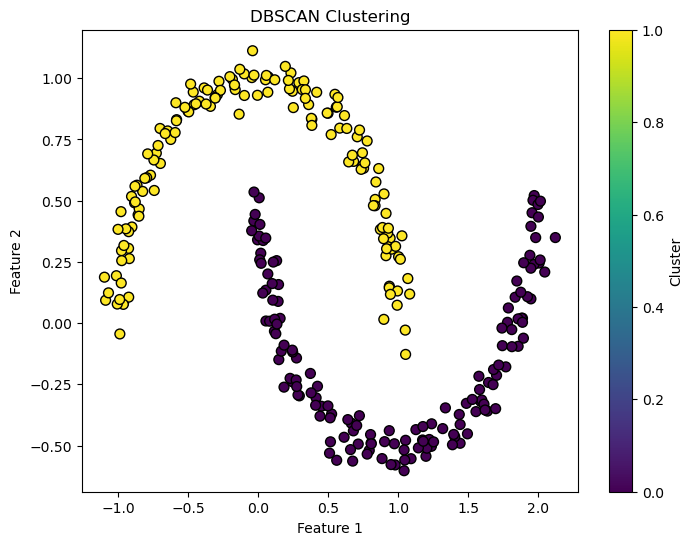

In [2]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# 生成模拟数据
X, _ = make_moons(n_samples=300, noise=0.05, random_state=0)

# 使用 DBSCAN 进行密度聚类
dbscan = DBSCAN(eps=0.3, min_samples=5)  # eps 是半径，min_samples 是最小点数
labels = dbscan.fit_predict(X)

# 可视化聚类结果
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, edgecolor='k')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

交易数据聚类结果：
       Amount       Time  Cluster
0  104.967142  13.852355        0
1   98.617357  15.818833        0
2  106.476885   9.202865        0
3  115.230299  13.125938        0
4   97.658466  10.698715        0


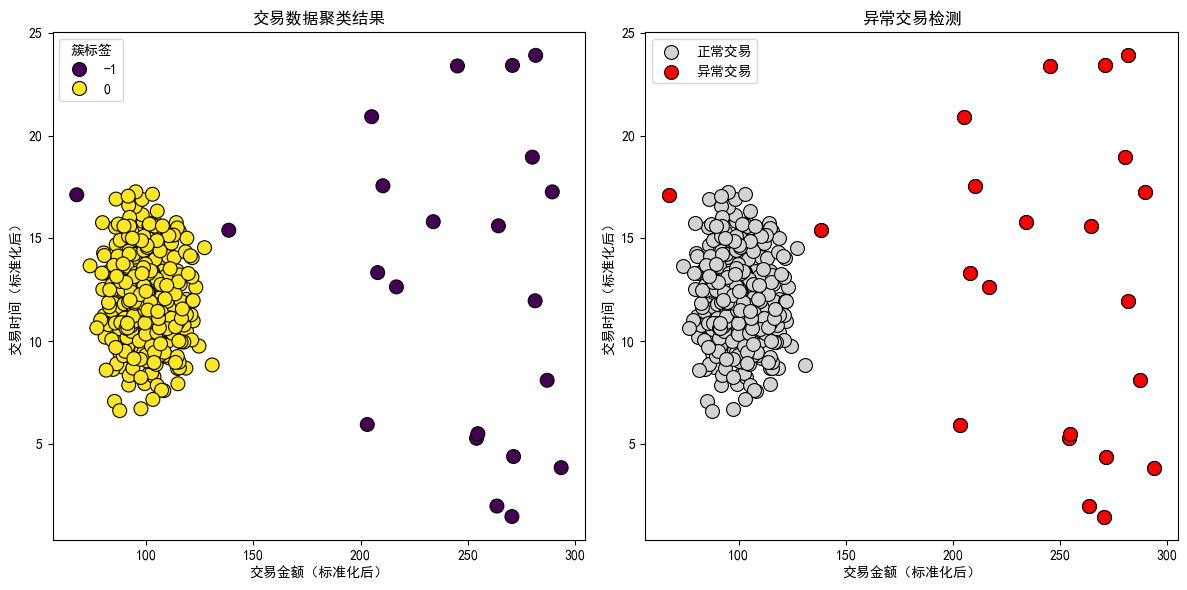


检测到的异常交易：
         Amount       Time  Cluster
209  138.527315  15.392913       -1
262   67.587327  17.120169       -1
500  216.748258  12.633664       -1
501  210.456784  17.558149       -1
502  263.643025   1.959120       -1
503  270.647573   1.448450       -1
504  203.158614   5.930478       -1
505  293.621225   3.829072       -1
506  205.197128  20.922806       -1
507  254.129634   5.261136       -1
508  270.906052  23.420766       -1
509  287.096912   8.085499       -1
510  271.408693   4.370830       -1
511  280.172808  18.952764       -1
512  233.945019  15.808987       -1
513  281.482511  11.956697       -1
514  208.011485  13.328725       -1
515  289.481666  17.260843       -1
516  254.759238   5.482914       -1
517  281.729777  23.912014       -1
518  245.231828  23.395036       -1
519  264.357770  15.607816       -1


In [6]:
# 导入必要的库
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN  # DBSCAN 密度聚类算法
from sklearn.preprocessing import StandardScaler  # 数据标准化
import matplotlib.pyplot as plt  # 数据可视化
import seaborn as sns  # 更美观的可视化

# 设置 Matplotlib 支持中文字符
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 设置随机种子，确保结果可复现
np.random.seed(42)

# 生成模拟交易数据
# 假设交易数据包括两个特征：交易金额（Amount）和交易时间（Time）
# 正常交易的金额和时间分布较为集中，异常交易则偏离正常范围
n_normal = 500  # 正常交易数量
n_anomaly = 20  # 异常交易数量

# 生成正常交易数据
normal_amount = np.random.normal(100, 10, n_normal)  # 交易金额，均值为 100，标准差为 10
normal_time = np.random.normal(12, 2, n_normal)  # 交易时间，均值为 12，标准差为 2

# 生成异常交易数据
anomaly_amount = np.random.uniform(200, 300, n_anomaly)  # 交易金额，范围为 200 到 300
anomaly_time = np.random.uniform(0, 24, n_anomaly)  # 交易时间，范围为 0 到 24

# 合并正常交易和异常交易数据
amount = np.concatenate([normal_amount, anomaly_amount])
time = np.concatenate([normal_time, anomaly_time])

# 创建交易数据 DataFrame
transactions = pd.DataFrame({
    'Amount': amount,
    'Time': time
})

# 数据标准化
# DBSCAN 对特征的尺度敏感，因此需要对数据进行标准化
scaler = StandardScaler()
transactions_scaled = scaler.fit_transform(transactions)

# 使用 DBSCAN 进行密度聚类
# eps: 邻域半径，min_samples: 最小点数
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(transactions_scaled)  # 获取每个样本点的簇标签

# 将聚类结果添加到 DataFrame 中
transactions['Cluster'] = labels

# 打印聚类结果
print("交易数据聚类结果：")
print(transactions.head())

# 可视化聚类结果
plt.figure(figsize=(12, 6))

# 绘制交易数据的散点图
plt.subplot(1, 2, 1)
sns.scatterplot(
    x='Amount', 
    y='Time', 
    hue='Cluster', 
    data=transactions, 
    palette='viridis', 
    s=100, 
    edgecolor='k'
)
plt.title('交易数据聚类结果')
plt.xlabel('交易金额（标准化后）')
plt.ylabel('交易时间（标准化后）')
plt.legend(title='簇标签')

# 绘制异常交易的分布
plt.subplot(1, 2, 2)
anomalies = transactions[transactions['Cluster'] == -1]  # 异常交易的簇标签为 -1
sns.scatterplot(
    x='Amount', 
    y='Time', 
    data=transactions, 
    color='lightgray', 
    label='正常交易', 
    s=100, 
    edgecolor='k'
)
sns.scatterplot(
    x='Amount', 
    y='Time', 
    data=anomalies, 
    color='red', 
    label='异常交易', 
    s=100, 
    edgecolor='k'
)
plt.title('异常交易检测')
plt.xlabel('交易金额（标准化后）')
plt.ylabel('交易时间（标准化后）')
plt.legend()

plt.tight_layout()
plt.show()

# 输出异常交易的详细信息
print("\n检测到的异常交易：")
print(anomalies)